In [64]:
from google.colab import drive
drive.mount ('/content/gdrive')
# /content/gdrive/Shareddrives/DATA_606_Capstone

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Let us start by reading our cleaned data and start our initial data explorations

In [65]:
import numpy as np 
import pandas as pd 
from datetime import datetime 
import time 
import csv
# import os 
import matplotlib.pyplot as plt
import regex as re

from statsmodels.datasets import longley
from statsmodels.formula.api import ols


# from pandas import Series,DataFrame
#import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style('whitegrid')
%matplotlib inline

# from lazypredict.Supervised import LazyClassifier

# from sklearn.model_selection import train_test_split

In [66]:
def read_data(filename):
    start_time = time.time()
    df=pd.read_csv(filename,low_memory=False,encoding='cp1252') # added encoding because I was getting an error in reading the files 
    # https://stackoverflow.com/questions/45529507/unicodedecodeerror-utf-8-codec-cant-decode-byte-0x96-in-position-35-invalid
        # df=pd.read_csv(filename,low_memory=False)
    print(time.time() - start_time, 'seconds')
    return df

In [67]:
df_merged_all_clean = read_data('/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/df_merged_all_clean.csv')

0.07833480834960938 seconds


In [68]:
df_merged_all_clean.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [69]:
df_merged_all_clean.columns

Index(['UNITID', 'INSTNM', 'STABBR', 'OBEREG', 'HLOFFER', 'GROFFER',
       'HDEGOFFR', 'HBCU', 'LOCALE', 'INSTCAT', 'INSTSIZE', 'CNTLAFFI',
       'LEVEL3', 'LEVEL5', 'CALSYS', 'FT_UG', 'FT_FTUG', 'PT_UG', 'PT_FTUG',
       'OPENADMP', 'VET1', 'VET2', 'CREDITS1', 'CREDITS2', 'CREDITS3',
       'CREDITS4', 'SLO5', 'SLO6', 'SLO7', 'SLO83', 'YRSCOLL', 'STUSRV1',
       'STUSRV2', 'STUSRV3', 'STUSRV4', 'STUSRV8', 'STUSRV9', 'LIBRES1',
       'TUITPL', 'TUITPL1', 'TUITPL2', 'TUITPL3', 'TUITPL4', 'DSTNUGC',
       'DSTNUGP', 'DSTNCED1', 'ALLONCAM', 'TUITVARY', 'ROOM', 'BOARD',
       'APPLFEEU', 'RMANDBRDAMT', 'EFYTOTLT', 'ADMCON1', 'ADMCON2', 'ADMCON3',
       'ADMCON4', 'ADMCON5', 'ADMCON6', 'ADMCON7', 'ADMCON8', 'ADMCON9',
       'APPLCN', 'ADMSSN', 'ENRLT'],
      dtype='object')

### After checking the data again we immediately notice that we are not fully done with the data cleaning; we still need to transform our data admission policy data into intteger values to simplify our modeling

In [70]:
df_merged_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 65 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UNITID       3547 non-null   int64  
 1   INSTNM       3547 non-null   object 
 2   STABBR       3547 non-null   object 
 3   OBEREG       3547 non-null   int64  
 4   HLOFFER      3547 non-null   int64  
 5   GROFFER      3547 non-null   int64  
 6   HDEGOFFR     3547 non-null   int64  
 7   HBCU         3547 non-null   int64  
 8   LOCALE       3547 non-null   int64  
 9   INSTCAT      3547 non-null   int64  
 10  INSTSIZE     3547 non-null   int64  
 11  CNTLAFFI     3547 non-null   int64  
 12  LEVEL3       3547 non-null   int64  
 13  LEVEL5       3547 non-null   int64  
 14  CALSYS       3547 non-null   int64  
 15  FT_UG        3547 non-null   int64  
 16  FT_FTUG      3547 non-null   int64  
 17  PT_UG        3547 non-null   int64  
 18  PT_FTUG      3547 non-null   int64  
 19  OPENAD

In [71]:
cols2c=['ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4', 'ADMCON5', 'ADMCON6', 'ADMCON7', 'ADMCON8', 'ADMCON9', 'APPLCN', 'ADMSSN', 'ENRLT']

for i in cols2c:
  df_merged_all_clean[i] = df_merged_all_clean[i].astype(str)
  df_merged_all_clean[i] = df_merged_all_clean[i].map(lambda x: re.sub(r'\.0', '', x))
  df_merged_all_clean[i] = df_merged_all_clean[i].astype(int)

In [72]:
# df_merged_all_clean.info()

### Let us take a peak at the data distributions 

In [73]:
df_merged_all_clean.describe().round(decimals=2)

,UNITID,OBEREG,HLOFFER,GROFFER,HDEGOFFR,HBCU,LOCALE,INSTCAT,INSTSIZE,CNTLAFFI,...,ADMCON3,ADMCON4,ADMCON5,ADMCON6,ADMCON7,ADMCON8,ADMCON9,APPLCN,ADMSSN,ENRLT
count,3547.00,3547.00,3547.00,3547.0,3547.00,3547.00,3547.00,3547.00,3547.00,3547.00,...,3547.00,3547.00,3547.00,3547.00,3547.00,3547.00,3547.00,3547.00,3547.00,3547.00
mean,231495.49,4.58,6.00,1.5,26.02,1.97,20.86,2.75,2.16,2.18,...,2.07,2.51,2.66,2.91,2.91,2.30,2.93,3240.86,1962.28,440.70
std,114235.12,2.18,2.35,0.5,11.30,0.16,10.34,0.91,1.15,1.22,...,1.02,0.88,0.97,0.57,1.20,1.04,0.45,8464.46,4584.93,1084.19
min,100654.00,0.00,3.00,1.0,11.00,1.00,-3.00,2.00,-1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,155579.50,3.00,3.00,1.0,13.00,2.00,12.00,2.00,1.00,1.00,...,1.00,2.00,2.00,3.00,2.00,1.00,3.00,3.00,3.00,3.00
50%,197984.00,5.00,5.00,2.0,30.00,2.00,21.00,2.00,2.00,2.00,...,3.00,3.00,3.00,3.00,3.00,3.00,3.00,7.00,4.00,3.00
75%,236355.00,6.00,9.00,2.0,40.00,2.00,32.00,4.00,3.00,3.00,...,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2549.00,1750.50,377.50
max,494898.00,9.00,9.00,2.0,40.00,2.00,43.00,4.00,5.00,4.00,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,108870.00,47290.00,15720.00


### Something that is noticable immediately after having looked at the data distribution is the fact that the minimum values for Admissions, Applications, and Enrollment are zeros. This seems unusual given the fact that we have selected only institutions that are actively operating in the year 2020. 

### When we double check this, we see that there are 11 Institutions that have this characteristic

In [74]:
#

df_merged_all_clean.loc[lambda df_merged_all_clean:((df_merged_all_clean['APPLCN']==0)&(df_merged_all_clean['ADMSSN']==0)&(df_merged_all_clean['ENRLT']==0)),:]


,UNITID,INSTNM,STABBR,OBEREG,HLOFFER,GROFFER,HDEGOFFR,HBCU,LOCALE,INSTCAT,...,ADMCON3,ADMCON4,ADMCON5,ADMCON6,ADMCON7,ADMCON8,ADMCON9,APPLCN,ADMSSN,ENRLT
628,142957,American Islamic College,IL,3,7,1,20,2,11,2,...,3,3,1,3,3,2,3,0,0,0
692,146755,Trinity College of Nursing & Health Sciences,IL,3,7,1,20,2,13,2,...,1,1,3,3,3,1,3,0,0,0
794,152798,Allen College,IA,4,9,1,12,2,13,2,...,3,3,1,3,3,3,3,0,0,0
1462,183248,St Joseph School of Nursing,NH,1,3,2,40,2,13,4,...,1,3,1,3,3,1,1,0,0,0
2606,233408,Riverside College of Health Careers,VA,5,5,2,30,2,12,3,...,1,3,3,3,3,1,1,0,0,0
2995,430485,The Creative Center,NE,4,5,2,30,2,11,3,...,1,3,1,1,3,3,3,0,0,0
3001,431983,Yeshiva of the Telshe Alumni,NY,2,5,2,30,2,11,2,...,2,1,1,3,3,3,3,0,0,0
3272,460376,Fairfax University of America,VA,5,7,1,20,2,21,2,...,1,3,3,3,3,1,3,0,0,0
3366,482547,DeVry University-Nevada,NV,8,7,1,20,2,11,2,...,1,3,3,3,2,2,2,0,0,0
3452,488004,Central Yeshiva Beth Joseph,NY,2,5,2,30,2,11,2,...,2,1,1,3,3,3,3,0,0,0


###  The Institutions have overlap and are only 11 in total number - This data seems to be either inaccurate or the institutions are on the way to being closed. 
### To play it safe, we will eliminate these HEIs from our DF 

In [75]:
df1 = df_merged_all_clean.loc[lambda df_merged_all_clean:((df_merged_all_clean['APPLCN']!=0)&(df_merged_all_clean['ADMSSN']!=0)&(df_merged_all_clean['ENRLT']!=0)),:]

df_merged_all_clean1=df1.copy(deep=False)

In [76]:
# df_merged_all_clean1.info()

In [77]:
# df_merged_all_clean1['HBCU'].unique()

In [78]:
# sns.countplot(df_merged_all_clean1.STABBR) 

### Taking a peak at the distribution of the Institutions by Economic Area (again)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


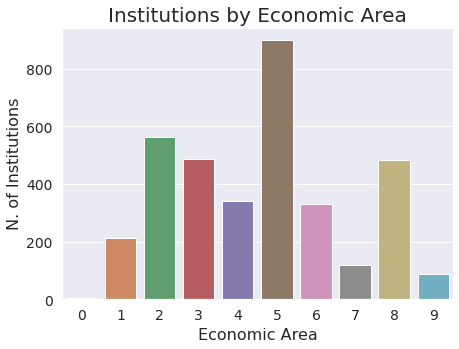

In [79]:
sns.set(rc = {'figure.figsize':(7,5)})

obereg = {0: 'US Service schools', 1:'New England (CT ME MA NH RI VT)', 2:'Mid East (DE DC MD NJ NY PA)',3:'Great Lakes (IL IN MI OH WI)', 4: 'Plains (IA KS MN MO NE ND SD)',
          5: 'Southeast (AL AR FL GA KY LA MS NC SC TN VA WV)', 6:'Southwest (AZ NM OK TX)',7:'Rocky Mountains (CO ID MT UT WY)',8:'Far West (AK CA HI NV OR WA)',
          9:'Outlying areas (AS FM GU MH MP PR PW VI)'}

sns.countplot(df_merged_all_clean1.OBEREG) 

#place legend outside top right corner of plot
# plt.legend(obereg, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel('Economic Area', fontsize=16);
plt.ylabel('N. of Institutions', fontsize=16);
plt.title('Institutions by Economic Area', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)

### Taking a peak at the distribution of the Institutions by Degree Level Offerings (again)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


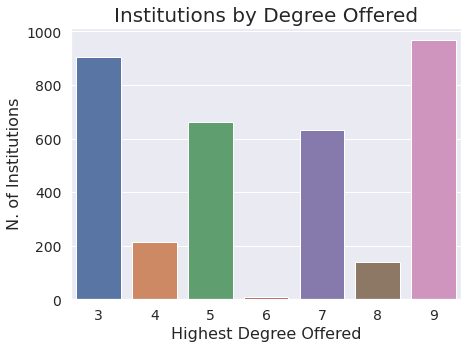

In [80]:

sns.set(rc = {'figure.figsize':(7,5)})

sns.countplot(df_merged_all_clean1.HLOFFER) 


plt.xlabel('Highest Degree Offered', fontsize=16);
plt.ylabel('N. of Institutions', fontsize=16);
plt.title('Institutions by Degree Offered', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)

### Taking a peak at the distribution of the Institutions by whether they offer ONLY Undergraduate degrees or both Graduate and undergraduate degrees we see that the data is balanced from this perspective 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


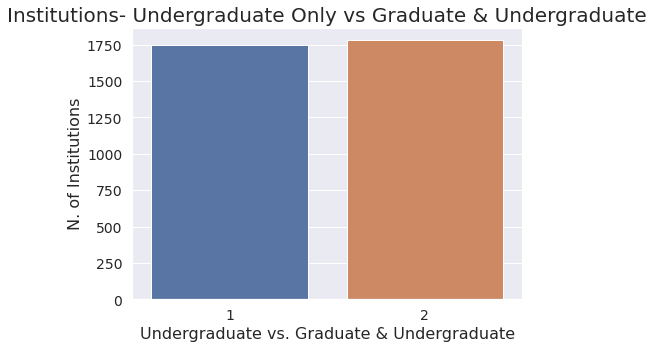

In [81]:


sns.set(rc = {'figure.figsize':(7,5)})

sns.countplot(df_merged_all_clean1.GROFFER) 


plt.xlabel('Undergraduate vs. Graduate & Undergraduate', fontsize=16);
plt.ylabel('N. of Institutions', fontsize=16);
plt.title('Institutions- Undergraduate Only vs Graduate & Undergraduate', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)

# The data is balanced from the perspective of the number of institutions offering Only Undergraduate degrees and those offering Both Under and Graduate degrees in our DF

### Taking a peak at the distribution of the Institutions by program (note that codes 11-14 indicate Doctorate level degrees; code 20 = Masters; code 30 = Bachelors; and code 40 = Associates degrees)

### Clearly there greater competition among Institutions offering lower level degrees (these are in fact significantly more numerous.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


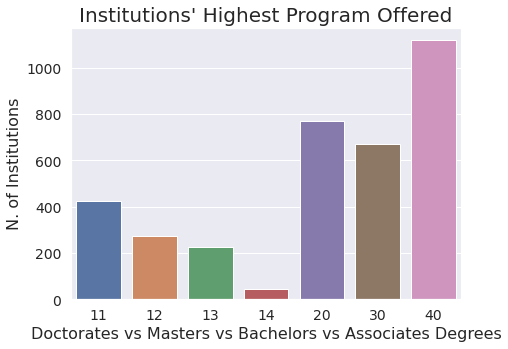

In [82]:
sns.set(rc = {'figure.figsize':(7,5)})

sns.countplot(df_merged_all_clean1.HDEGOFFR) 


plt.xlabel('Doctorates vs Masters vs Bachelors vs Associates Degrees', fontsize=16);
plt.ylabel('N. of Institutions', fontsize=16);
plt.title("Institutions' Highest Program Offered", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)

# Types of Programs offered

### The  Disparity in number of HBCUs (Historically Black College or University) is striking 

### The data is highly unbalanced which will make treating this feature tricky 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


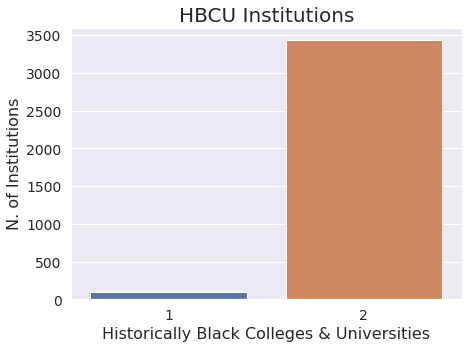

In [83]:


sns.set(rc = {'figure.figsize':(7,5)})

sns.countplot(df_merged_all_clean1.HBCU) 


plt.xlabel('Historically Black Colleges & Universities', fontsize=16);
plt.ylabel('N. of Institutions', fontsize=16);
plt.title("HBCU Institutions", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# The number of Institutions that are HBCU are minimal in comparison to the overall total - The data is NOT balanced 

### The distribution of the Number of Institutions by location is fairly uneven as well

### Urban settings seem to attract the greatest number of HEIs - not surprising really) 

1.   Urban - codes 11-13 
2.   Sub-Urban - codes 21-23 and 31-33, if we include townships - and
1.   Rural - codes 41-43





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


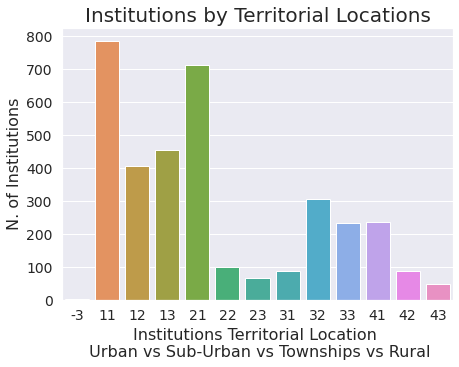

In [84]:

sns.set(rc = {'figure.figsize':(7,5)})

sns.countplot(df_merged_all_clean1.LOCALE) 


plt.xlabel('Institutions Territorial Location \n Urban vs Sub-Urban vs Townships vs Rural', fontsize=16);
plt.ylabel('N. of Institutions', fontsize=16);
plt.title("Institutions by Territorial Locations", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# Distribution of Institutions by Rural vs Urban vs Suburban location

### The distribution of HEIs by Institutional Category  is also fairly unbalanced. Here we can see that most of the HEIs are coded as degree granting at a higher level than undergrate degree programs - However, we must keep in mind that we have previously aggreagted this data. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


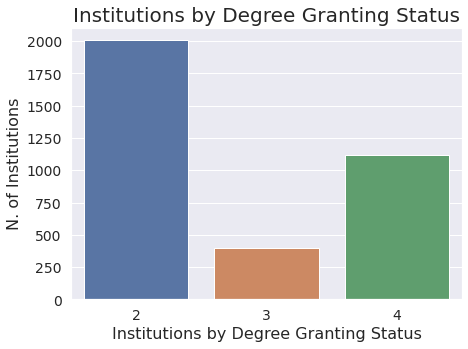

In [85]:



sns.set(rc = {'figure.figsize':(7,5)})

sns.countplot(df_merged_all_clean1.INSTCAT) 


plt.xlabel('Institutions by Degree Granting Status', fontsize=16);
plt.ylabel('N. of Institutions', fontsize=16);
plt.title("Institutions by Degree Granting Status", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# 

# Distribution of Institutions by 

### Checking Institutions' number by size, we can see that the greatest number of HEIs are chacterized by being relatively small in size (codes 1 and 2 where potential enrollment could respectively reach up to  1000 and 4,999 students)
### The largest institutions enrolling above 20,000 students (code 5) are the minorty 

### Again the data is  unbalanced 

INSTSIZE	1	Under 1,000

INSTSIZE	2	1,000 - 4,999

INSTSIZE	3	5,000 - 9,999

INSTSIZE	4	10,000 - 19,999

INSTSIZE	5	20,000 and above

INSTSIZE	-1	Not reported 

INSTSIZE	-2	Not applicable

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


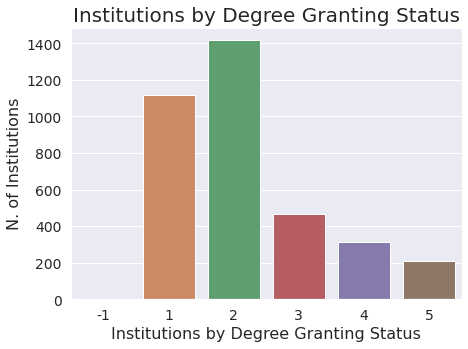

In [86]:

sns.set(rc = {'figure.figsize':(7,5)})

sns.countplot(df_merged_all_clean1.INSTSIZE) 


plt.xlabel('Institutions by Degree Granting Status', fontsize=16);
plt.ylabel('N. of Institutions', fontsize=16);
plt.title("Institutions by Degree Granting Status", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# Distribution of Institutions by Size 

### Looking at Institutions' distribution in  terms of Private versus Public Control, we can see a relatively more even distribution of these organization, although Private HEIs can be further subdivided in For-Profit and Not-For Profit ones

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


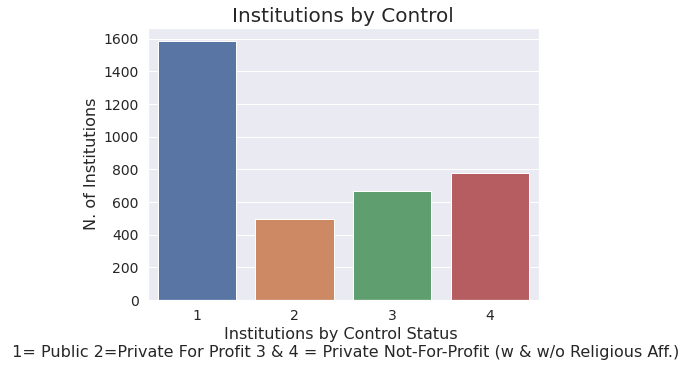

In [87]:


sns.set(rc = {'figure.figsize':(7,5)})

sns.countplot(df_merged_all_clean1.CNTLAFFI) 


plt.xlabel('Institutions by Control Status \n 1= Public 2=Private For Profit 3 & 4 = Private Not-For-Profit (w & w/o Religious Aff.)', fontsize=16);
plt.ylabel('N. of Institutions', fontsize=16);
plt.title("Institutions by Control", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# Distribution of Institutions by Control  

In [88]:
# sns.countplot(df_merged_all_clean1.LEVEL3) 
# # Distribution of Institutions by  Associates Degree Offering 

### If we take a look at the correlation between Admission Numbers and actual ENrollment Numbers, by Economic Area, as we would expect we can see a clear correlation between the data

### The same is true with alittle more dispersion for the relationship between Application numbers and Enrollment, which seems to confirm the tendency of students to submit applications to a wide number of institutions

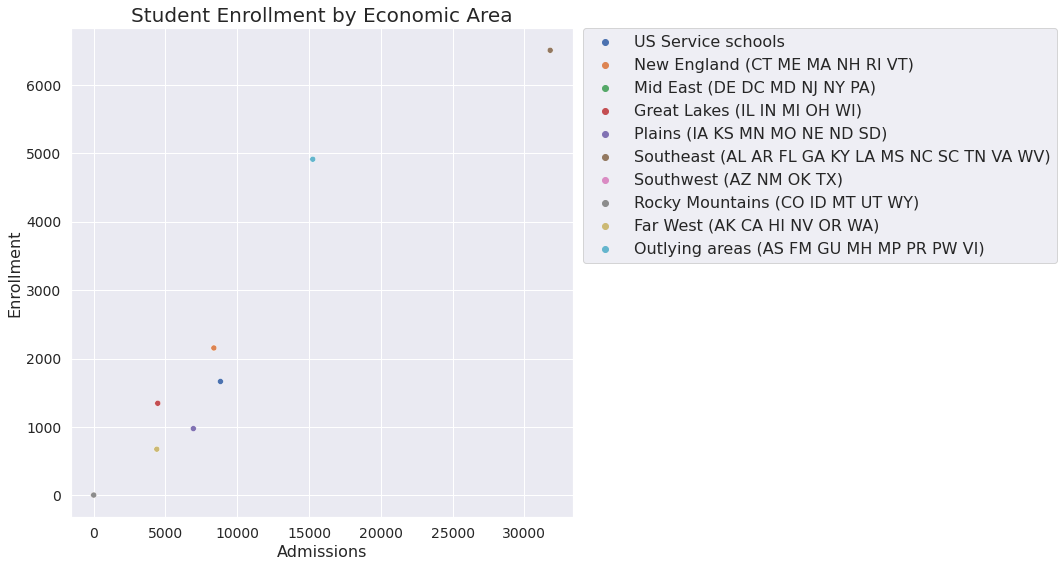

In [89]:
# sns.set(font_scale=50)

sns.set(rc = {'figure.figsize':(9,9)})


obereg = {0: 'US Service schools', 1:'New England (CT ME MA NH RI VT)', 2:'Mid East (DE DC MD NJ NY PA)',3:'Great Lakes (IL IN MI OH WI)', 4: 'Plains (IA KS MN MO NE ND SD)',
          5: 'Southeast (AL AR FL GA KY LA MS NC SC TN VA WV)', 6:'Southwest (AZ NM OK TX)',7:'Rocky Mountains (CO ID MT UT WY)',8:'Far West (AK CA HI NV OR WA)',
          9:'Outlying areas (AS FM GU MH MP PR PW VI)'}

sns.scatterplot(data= df_merged_all_clean1, x='ADMSSN', y='ENRLT', hue=obereg)#.set(title='Student Enrollment by Economic Area')

#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel('Admissions', fontsize=16);
plt.ylabel('Enrollment', fontsize=16);
plt.title('Student Enrollment by Economic Area', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)

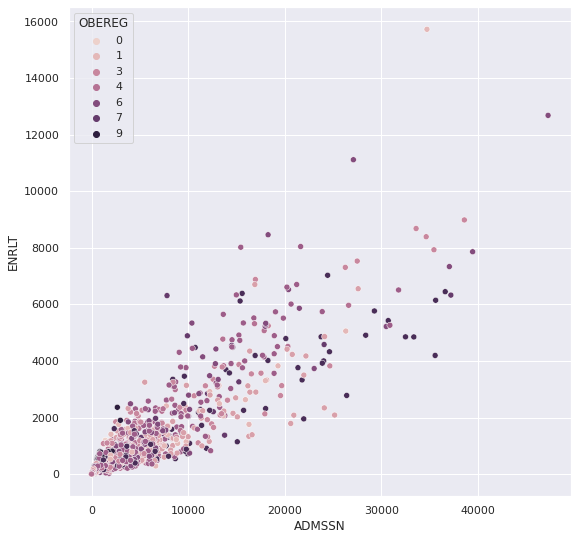

In [90]:
sns.scatterplot(data= df_merged_all_clean1, x='ADMSSN', y='ENRLT', hue='OBEREG')

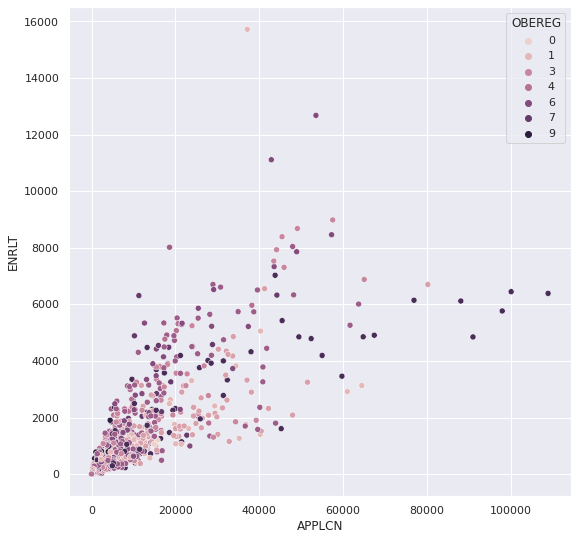

In [91]:
sns.scatterplot(data= df_merged_all_clean1, x='APPLCN', y='ENRLT', hue='OBEREG')

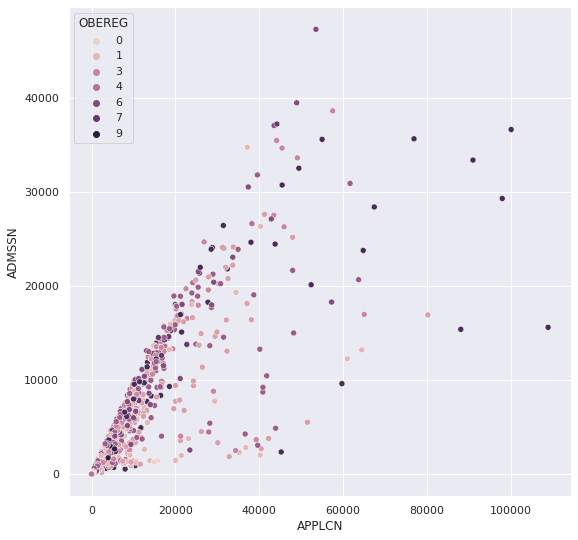

In [92]:
sns.scatterplot(data= df_merged_all_clean1, x='APPLCN', y='ADMSSN', hue='OBEREG')

### Taking a look at the Correlation existing between variables we can start going deeper on the individual relations we might see emerge as we continue our analysis. 

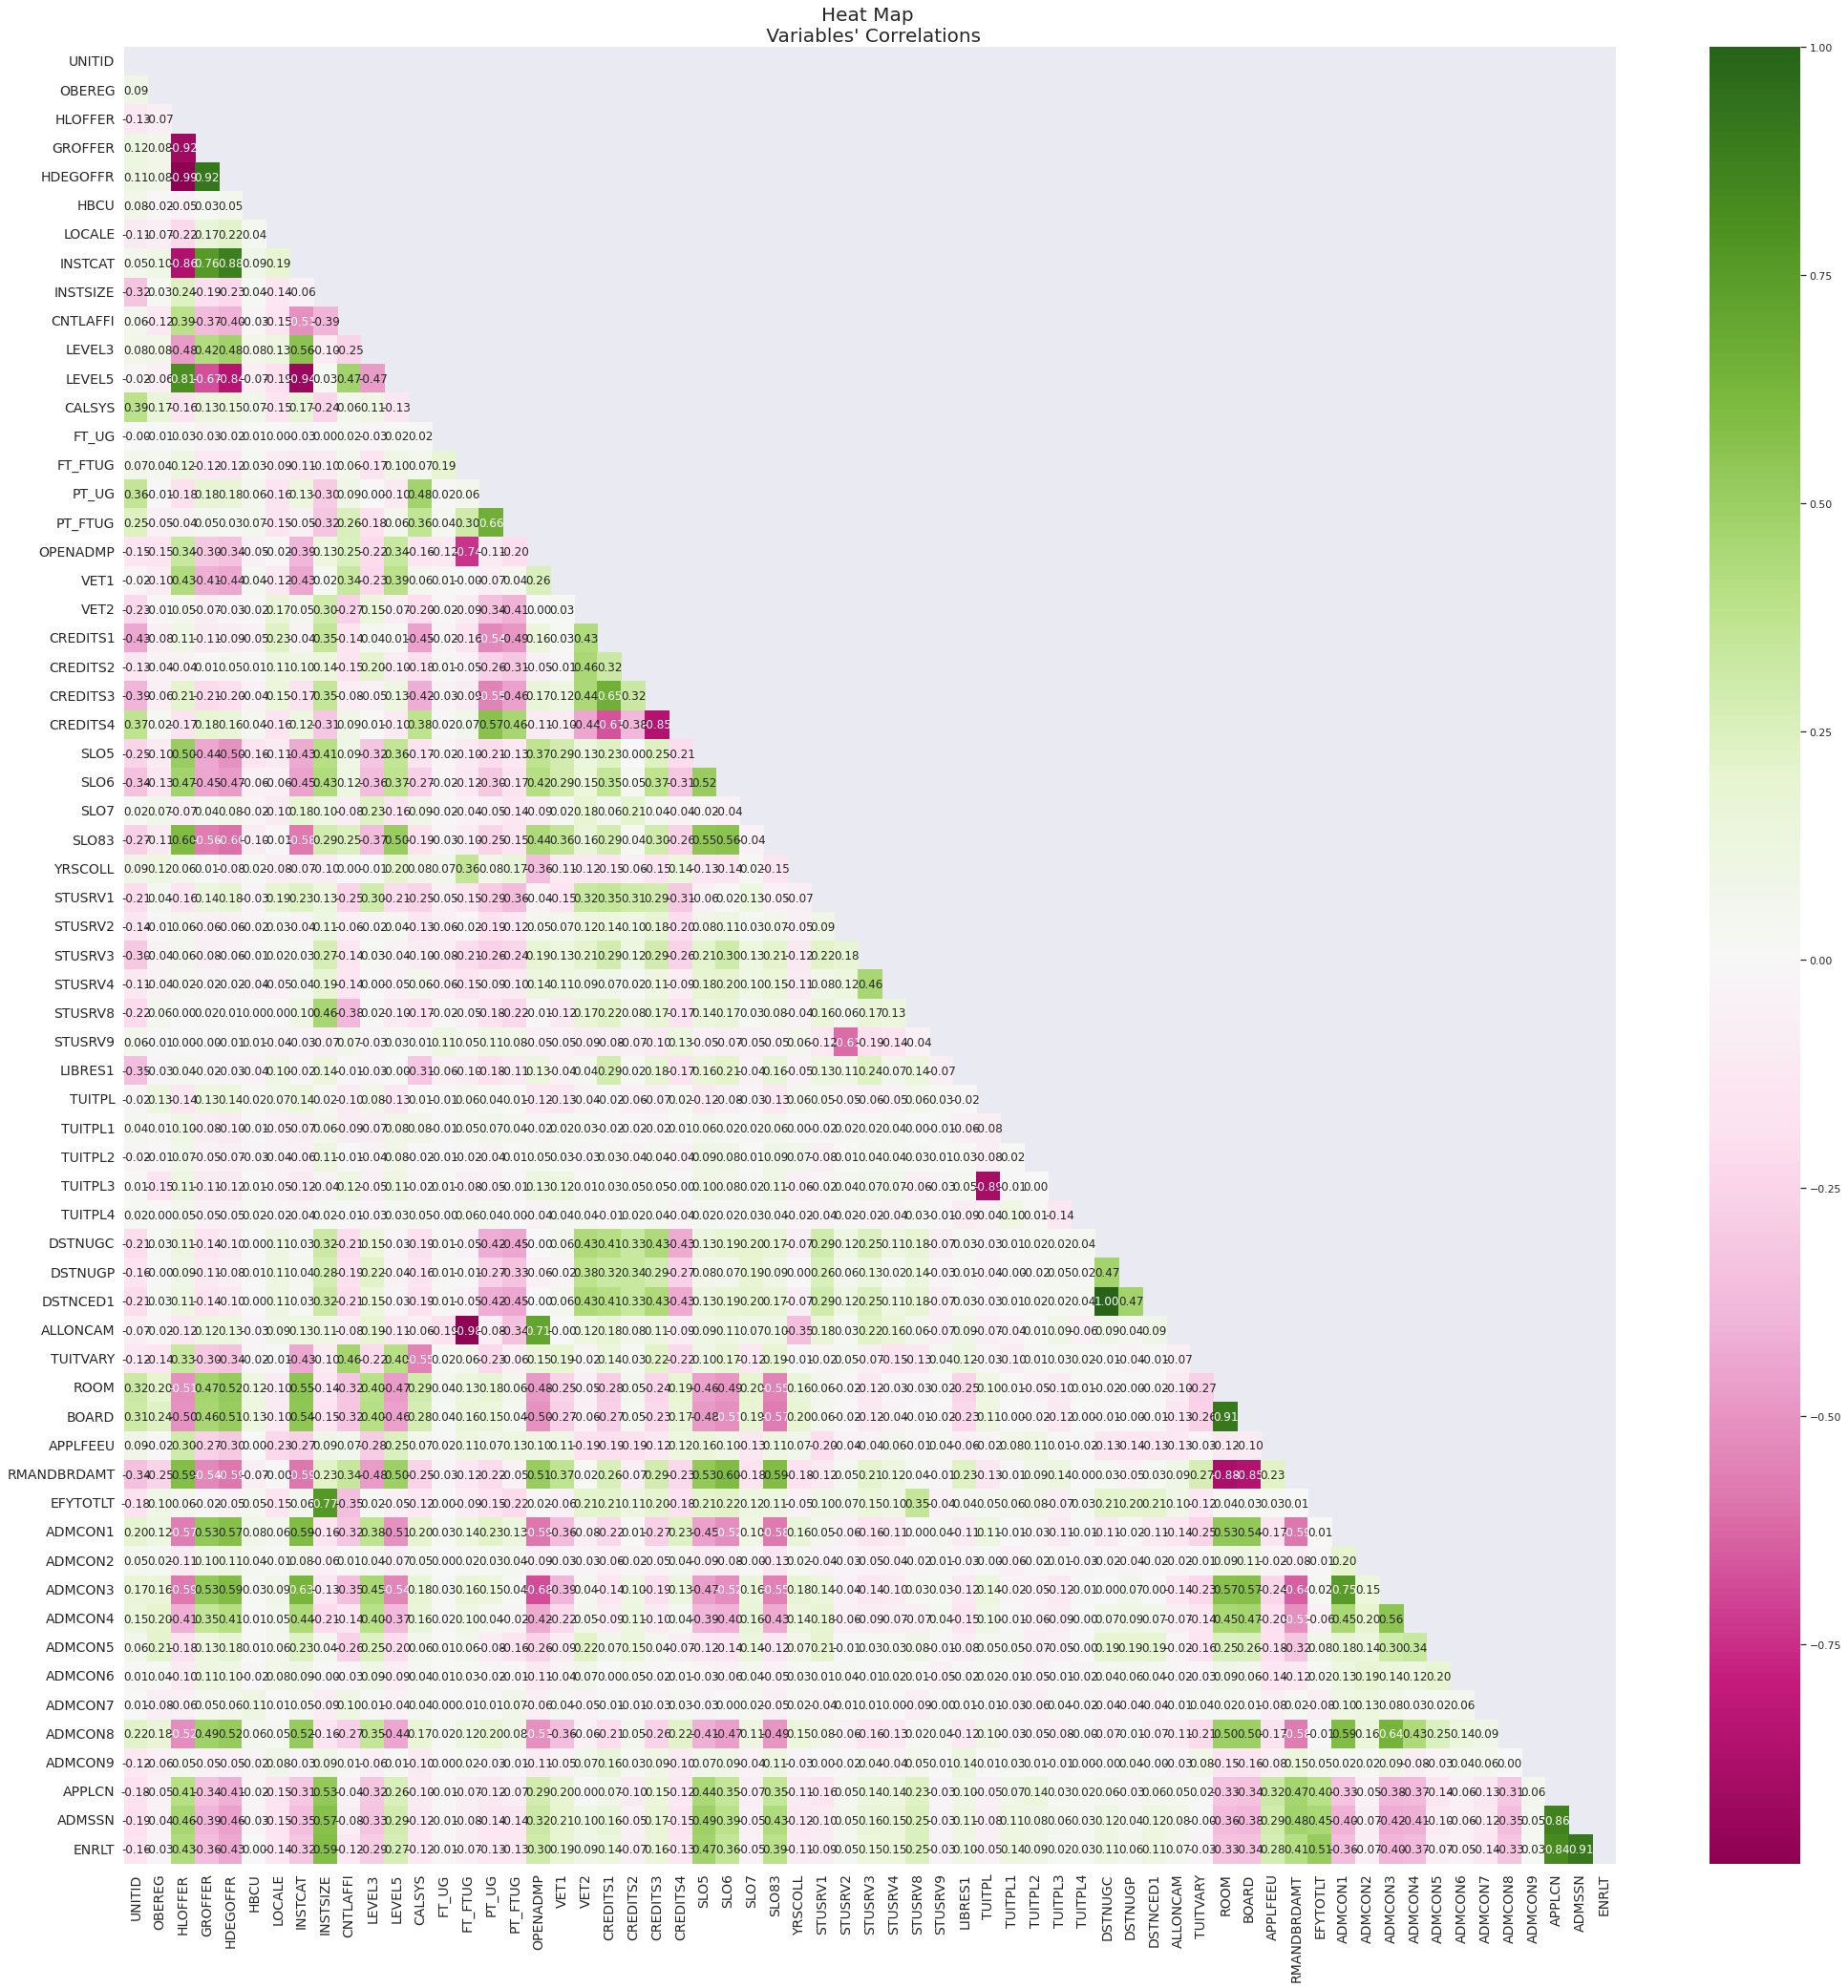

In [93]:
sns.set(rc = {'figure.figsize':(35,35)})
mask = np.triu(np.ones_like(df_merged_all_clean1.corr(), dtype=bool))
# sns.palplot(sns.diverging_palette(200, 100, n=11))
sns.heatmap(df_merged_all_clean1.corr(), mask =mask, annot=True, fmt=".2f",cmap="PiYG")


plt.title("Heat Map \n Variables' Correlations", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

### The greatest correlation with Application, Admission, and Enrollment Numbers appear to be HLOFFER, GROFFER, HDEOFFER, INSTCAT, INSTSIZE, LEVEL3 and 5, OPENADMP, SLO5, SLO6, SLO83, ROOM, BOARD, APPLEFEE, ADMCON1, ADMCON3, ADMCON4, ADMCON8.

### Interestingly from this first matrix Tuition Plans do not seem to have an effect on Enrollemnt dicisions or applications, if not minimal - 

### Let's take a closer look at these variables individually in relation to Final Enrollment decisions

### Looking at the correlation between Institutions offering Only programs up to a Bachelors' degree and those offering higher level degrees after that, enrollemnt by undergraduate students still seems to be influenced by higher level programs offered by the Institution. 

### This could be associated with the prestige associated with Institutions offering graduate and post graduate programs.

[Text(0.5, 1.0, 'Highest Degree Offered  vs. Tot. Enrollment')]

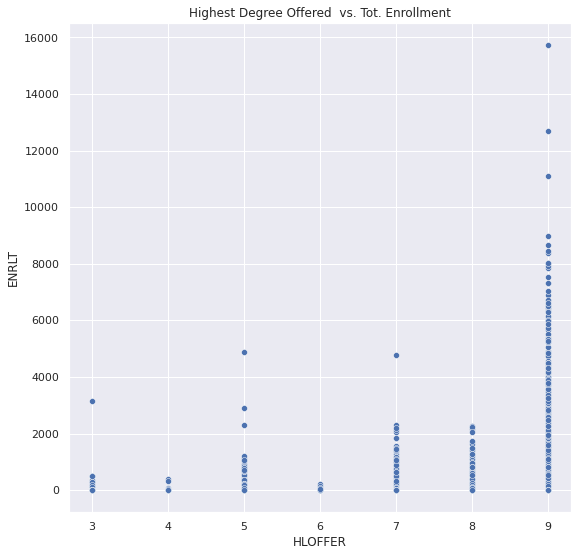

In [94]:
sns.set(rc = {'figure.figsize':(9,9)})
sns.scatterplot(data= df_merged_all_clean1, x='HLOFFER', y='ENRLT').set(title='Highest Degree Offered  vs. Tot. Enrollment')
# sns.boxplot(data=df_merged_all_clean1, x='HLOFFER', y='ENRLT').set(title='Points by Team')

# HLOFFER	1	Award of less than one academic year
# HLOFFER	2	At least 1, but less than 2 academic yrs
# HLOFFER	3	Associate's degree
# HLOFFER	4	At least 2, but less than 4 academic yrs
# HLOFFER	5	Bachelor's degree

# HLOFFER	6	Postbaccalaureate certificate
# HLOFFER	7	Master's degree
# HLOFFER	8	Post-master's certificate
# HLOFFER	9	Doctor's degree
# HLOFFER	-3	{Not available}

### Let su group this data such that there is a clearer division between typically Undergraduate programs and higher level degrees and check the data distribution to see if it is balanced afetr that  

In [95]:
# # Grouing the data into two wider categories does not balance the data 


# # DataFrame.mask(cond, other=nan, inplace=False, axis=None, level=None, errors='raise', try_cast=NoDefault.no_default)

# 
# df_merged_all_clean1['HLOFFER'].mask(df_merged_all_clean1['HLOFFER'] == 3, 1, inplace = True)
# df_merged_all_clean1['HLOFFER'].mask(df_merged_all_clean1['HLOFFER'] == 4, 1, inplace = True)
# df_merged_all_clean1['HLOFFER'].mask(df_merged_all_clean1['HLOFFER'] == 5, 1, inplace = True)
# df_merged_all_clean1['HLOFFER'].mask(df_merged_all_clean1['HLOFFER'] == 6, 1, inplace = True)
# df_merged_all_clean1['HLOFFER'].mask(df_merged_all_clean1['HLOFFER'] == 7, 2, inplace = True)
# df_merged_all_clean1['HLOFFER'].mask(df_merged_all_clean1['HLOFFER'] == 8, 2, inplace = True)
# df_merged_all_clean1['HLOFFER'].mask(df_merged_all_clean1['HLOFFER'] == 9, 2, inplace = True)

# # s.mask(s > 1, 10)

[Text(0.5, 1.0, 'Highest Degree Offered by Institutions \n (1=Undergraduate 1=Graduate)')]

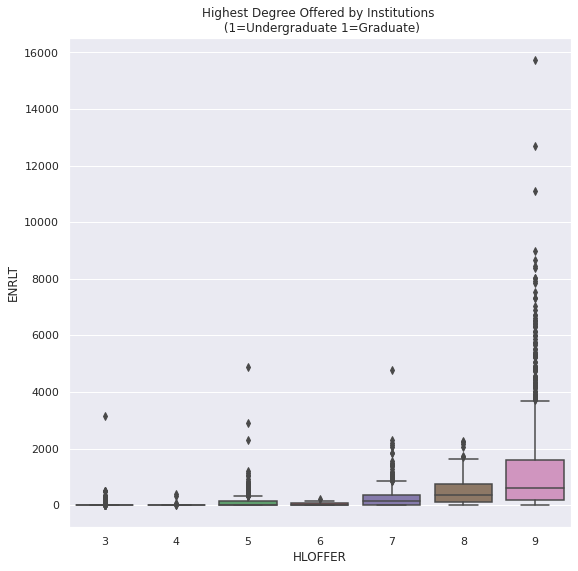

In [96]:
sns.boxplot(data=df_merged_all_clean1, x='HLOFFER', y='ENRLT').set(title='Highest Degree Offered by Institutions \n (1=Undergraduate 1=Graduate)')

### This second Scatter plot confirms this

[Text(0.5, 1.0, 'Undergraduate Only vs Graduate Degree Offering vs. Tot. Enrollment')]

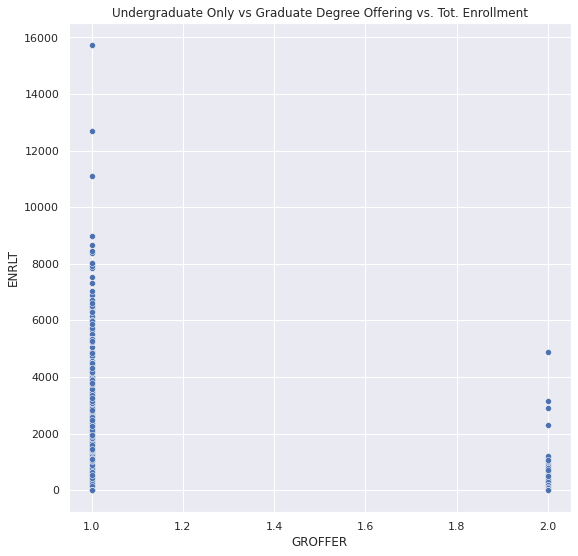

In [97]:
sns.set(rc = {'figure.figsize':(9,9)})
sns.scatterplot(data= df_merged_all_clean1, x='GROFFER', y='ENRLT').set(title='Undergraduate Only vs Graduate Degree Offering vs. Tot. Enrollment')

# GROFFER	1	Graduate degree or certificate offering
# GROFFER	2	No graduate offering

### Again taking a look at Enrollment by Undergraduate Students and  highest  program level offered by the Institution, the same results are confirmed. 

### The data is not evenly distributed, and Institutions with the Highest degree offerings seem to attract the greatest enrollments. Indirect name recognition seems to play a role.

### Let's group some of this data so that Associates and Bachelors degrees are grouped together and Doctoral degrees are also grouped together too. 

[Text(0.5, 1.0, 'Highest Degree Offered by Institution vs. Tot. Enrollment')]

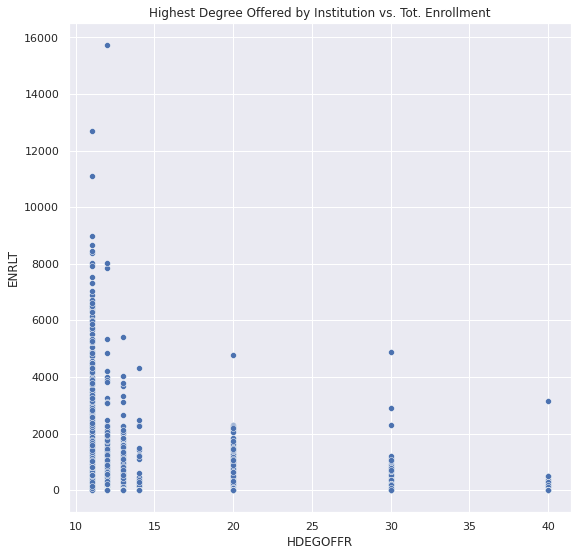

In [98]:
sns.set(rc = {'figure.figsize':(9,9)})
sns.scatterplot(data= df_merged_all_clean1, x='HDEGOFFR', y='ENRLT').set(title='Highest Degree Offered by Institution vs. Tot. Enrollment')

# HDEGOFR1	11	Doctor's degree - research/scholarship and professional practice
# HDEGOFR1	12	Doctor's degree - research/scholarship
# HDEGOFR1	13	Doctor's degree -  professional practice
# HDEGOFR1	14	Doctor's degree - other
# HDEGOFR1	20	Master's degree
# HDEGOFR1	30	Bachelor's degree
# HDEGOFR1	40	Associate's degree
# HDEGOFR1	0	Non-degree granting

### We could look at the box-plot distributions of the Institutions' enrollment by Highest Degree Offered and aggregate some of the codes but we would lose some information. 

In [99]:
# df_merged_all_clean1['HDEGOFFR'].mask(df_merged_all_clean1['HDEGOFFR'] == 11, 10, inplace = True)
# df_merged_all_clean1['HDEGOFFR'].mask(df_merged_all_clean1['HDEGOFFR'] == 12, 10, inplace = True)
# df_merged_all_clean1['HDEGOFFR'].mask(df_merged_all_clean1['HDEGOFFR'] == 13, 10, inplace = True)
# df_merged_all_clean1['HDEGOFFR'].mask(df_merged_all_clean1['HDEGOFFR'] == 14, 10, inplace = True)
# # df_merged_all_clean1['HDEGOFFR'].mask(df_merged_all_clean1['HDEGOFFR'] == 30, 10, inplace = True)
# df_merged_all_clean1['HDEGOFFR'].mask(df_merged_all_clean1['HDEGOFFR'] == 40, 30, inplace = True)

# sns.boxplot(data=df_merged_all_clean1, x='HDEGOFFR', y='ENRLT').set(title='Highest Degree Offered by Institutions \n (10=Doctorate; 20 = Masters; 30 = Bachelors & below')

### Institutions' locations also seems to affect enrollment decisions by Undergraduate students, with the highest enrollments appearing for Institutions located in URBAN settings 

[Text(0.5, 1.0, 'Urban vs Suburban vs Rural Location vs. Tot. Enrollment')]

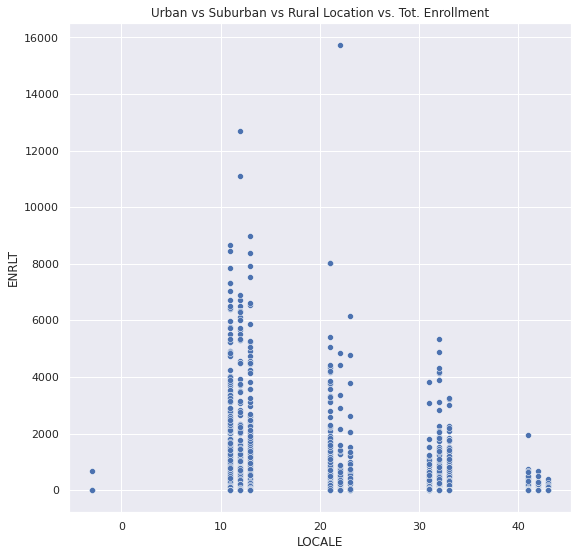

In [100]:
sns.set(rc = {'figure.figsize':(9,9)})
sns.scatterplot(data= df_merged_all_clean1, x='LOCALE', y='ENRLT').set(title='Urban vs Suburban vs Rural Location vs. Tot. Enrollment')

# URBAN SETTING 
# LOCALE	11	City: Large
# LOCALE	12	City: Midsize
# LOCALE	13	City: Small

# SUBURBAN SETTING 
# LOCALE	21	Suburb: Large
# LOCALE	22	Suburb: Midsize
# LOCALE	23	Suburb: Small
# LOCALE	31	Town: Fringe
# LOCALE	32	Town: Distant
# LOCALE	33	Town: Remote

# RURAL SETTING 
# LOCALE	41	Rural: Fringe
# LOCALE	42	Rural: Distant
# LOCALE	43	Rural: Remote

# LOCALE	-3	{Not available}

### NOTE: There are three institutions whose "LOCALE" is coded as -3. 

### These are Institutions located in the US Territories of:

### FM – Federated States of Micronesia. (173 pop per km2) 
### MH – Marshall Islands. (365 pop per km2)
### PW – Palau. (39.4 Pop per km2)


In [101]:
# df_merged_all_clean1.loc((df_merged_all_clean1['LOCALE']==-3))
df_merged_all_clean1.loc[lambda df_merged_all_clean1:(df_merged_all_clean1['LOCALE']==-3),:]

,UNITID,INSTNM,STABBR,OBEREG,HLOFFER,GROFFER,HDEGOFFR,HBCU,LOCALE,INSTCAT,...,ADMCON3,ADMCON4,ADMCON5,ADMCON6,ADMCON7,ADMCON8,ADMCON9,APPLCN,ADMSSN,ENRLT
2827,243638,College of Micronesia-FSM,FM,9,5,2,30,2,-3,3,...,3,3,3,3,2,2,1,1352,1125,663
2828,243647,Palau Community College,PW,9,3,2,40,2,-3,4,...,3,3,3,3,3,3,3,3,3,3
2901,376695,College of the Marshall Islands,MH,9,5,2,30,2,-3,3,...,3,3,3,3,3,3,3,3,3,3


### We could merge some of the areas based on similarity: groupings would be:

### Urban (codes 11-13 coded as 10); Suburban (codes 21-23 and codes 31-33 coded as 20) and Rural (codes 41-43 and code -3 coded as 40); 

### However, while I have set this up below I will hold off a moment before procceding with this

In [102]:
# df_merged_all_clean1['LOCALE'].mask(df_merged_all_clean1['LOCALE'] == 11, 10, inplace = True)
# df_merged_all_clean1['LOCALE'].mask(df_merged_all_clean1['LOCALE'] == 12, 10, inplace = True)
# df_merged_all_clean1['LOCALE'].mask(df_merged_all_clean1['LOCALE'] == 13, 10, inplace = True)
# df_merged_all_clean1['LOCALE'].mask(df_merged_all_clean1['LOCALE'] == 21, 20, inplace = True)
# df_merged_all_clean1['LOCALE'].mask(df_merged_all_clean1['LOCALE'] == 22, 20, inplace = True)
# df_merged_all_clean1['LOCALE'].mask(df_merged_all_clean1['LOCALE'] == 23, 20, inplace = True)
# df_merged_all_clean1['LOCALE'].mask(df_merged_all_clean1['LOCALE'] == 31, 20, inplace = True)
# df_merged_all_clean1['LOCALE'].mask(df_merged_all_clean1['LOCALE'] == 32, 20, inplace = True)
# df_merged_all_clean1['LOCALE'].mask(df_merged_all_clean1['LOCALE'] == 33, 20, inplace = True)
# df_merged_all_clean1['LOCALE'].mask(df_merged_all_clean1['LOCALE'] == 41, 40, inplace = True)
# df_merged_all_clean1['LOCALE'].mask(df_merged_all_clean1['LOCALE'] == 42, 40, inplace = True)
# df_merged_all_clean1['LOCALE'].mask(df_merged_all_clean1['LOCALE'] == 43, 40, inplace = True)
# df_merged_all_clean1['LOCALE'].mask(df_merged_all_clean1['LOCALE'] == -3, 40, inplace = True)



# sns.boxplot(data=df_merged_all_clean1, x='LOCALE', y='ENRLT').set(title='Distribution of Institutions by area \n (10=Urbadn; 20 = Suburban; 30 = Rural')

### Given the previously completed data cleaning we have already eliminated fromour df any institution that did not offer undergraduate programs 

### However, this variable identifies the Institution from the perspective of the where the institution places greatest emphasis - again Institutions granting higher level degrees are the most numerous, which seems to indicate that a shrinking nomber of institutions focus exclusively on the needs of undergraduates (this could be contributing to the influence program offering levels seem to have on enrollment choices) 

### It may be worth  aggregating checking the aggregation

[Text(0.5, 1.0, 'Undergraduate vs Graduate Degree Granting Institutions vs. Tot. Enrollment')]

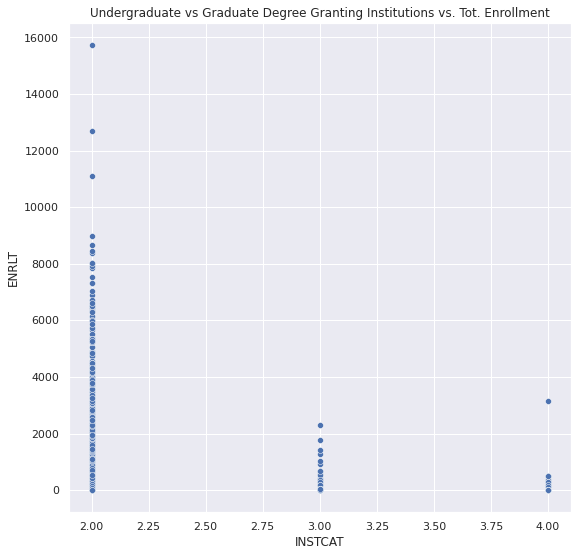

In [103]:
sns.set(rc = {'figure.figsize':(9,9)})
sns.scatterplot(data= df_merged_all_clean1, x='INSTCAT', y='ENRLT').set(title='Undergraduate vs Graduate Degree Granting Institutions vs. Tot. Enrollment')

# INSTCAT	1	Degree-granting, graduate with no undergraduate degrees
# INSTCAT	2	Degree-granting, primarily baccalaureate or above

# INSTCAT	3	Degree-granting, not primarily baccalaureate or above
# INSTCAT	4	Degree-granting, associate's and certificates

# INSTCAT	5	Nondegree-granting, above the baccalaureate

# INSTCAT	6	Nondegree-granting, sub-baccalaureate
# INSTCAT	-1	Not reported
# INSTCAT	-2	Not applicable

### Most of the Institutions fall into the group enrolling more than 20,000 students a year 

### It may be useful to group the df based on two primary sizes, Institutions enrolling more than 20,000 students versus those who do not 

### Larger Institutions seem to have a few outliers in terms of enrollement

[Text(0.5, 1.0, 'Institutional Size vs. Tot. Enrollment')]

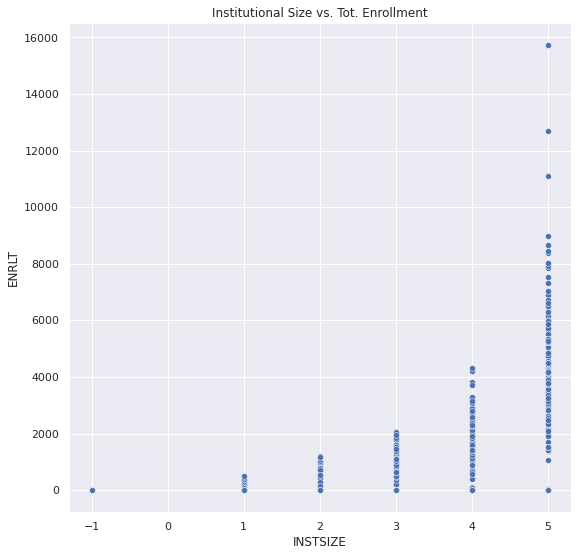

In [104]:
sns.set(rc = {'figure.figsize':(9,9)})
sns.scatterplot(data= df_merged_all_clean1, x='INSTSIZE', y='ENRLT').set(title='Institutional Size vs. Tot. Enrollment')

# INSTSIZE	1	Under 1,000
# INSTSIZE	2	1,000 - 4,999
# INSTSIZE	3	5,000 - 9,999
# INSTSIZE	4	10,000 - 19,999
# INSTSIZE	5	20,000 and above

# INSTSIZE	-1	Not reported
# INSTSIZE	-2	Not applicable

### The nature of the Institution, whether private for profit or public does not seem to have as much of an effect of enrollment. However, there are some exceptions. Outliers seem present in the Private for profit and not-for profit groups. 

[Text(0.5, 1.0, 'Public vs Private (for and not for Profit) Institutions vs. Tot. Enrollment')]

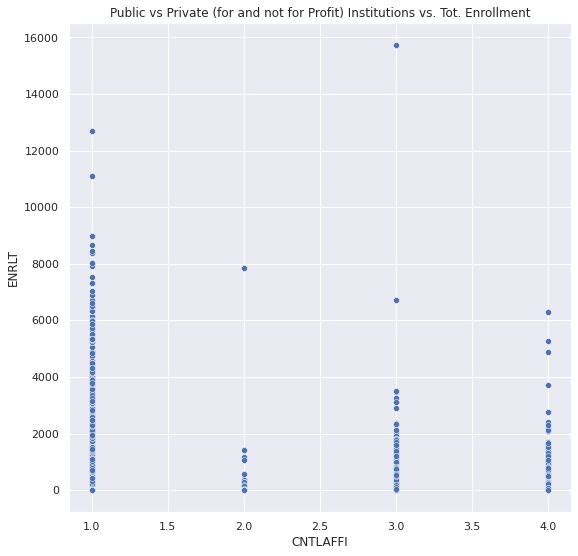

In [105]:
sns.set(rc = {'figure.figsize':(9,9)})
sns.scatterplot(data= df_merged_all_clean1, x='CNTLAFFI', y='ENRLT').set(title='Public vs Private (for and not for Profit) Institutions vs. Tot. Enrollment')

# CNTLAFFI	1	Public
# CNTLAFFI	2	Private for-profit
# CNTLAFFI	3	Private not-for-profit (no religious affiliation)
# CNTLAFFI	4	Private not-for-profit (religious affiliation)

### Half of the institutions offer at least an Associates' degree. 

### There is overlap between LEVL 3 and LEVEL 5 variables, however, as institutions were asked to select all levels of degrees that applied. Thus institutions here declaring that they do not offer an Associates' degree may be in fact offering higher level degrees instead 

[Text(0.5, 1.0, 'Associates Degrees Offered vs. Tot. Enrollment')]

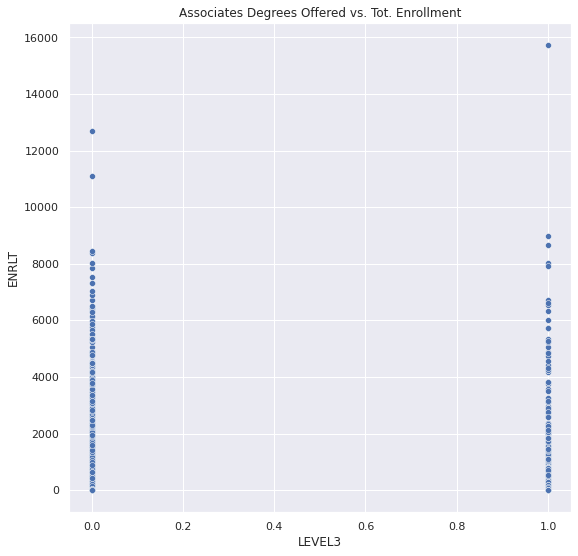

In [106]:
sns.set(rc = {'figure.figsize':(9,9)})
sns.scatterplot(data= df_merged_all_clean1, x='LEVEL3', y='ENRLT').set(title='Associates Degrees Offered vs. Tot. Enrollment')

# LEVEL 3 = Associates Degrees
# 1 = Yes 
# 0 = No

### The mojority of the institutions offer Bachelors' degrees. 

### There is overlap between LEVL 3 and LEVEL 5 variables as institutions were asked to select all levels of degrees that applied.

[Text(0.5, 1.0, 'Bachelor Degrees Offered vs. Tot. Enrollment')]

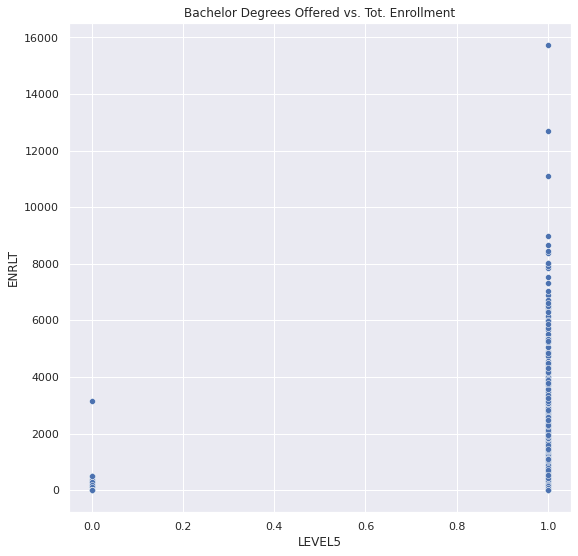

In [107]:
sns.set(rc = {'figure.figsize':(9,9)})
sns.scatterplot(data= df_merged_all_clean1, x='LEVEL5', y='ENRLT').set(title='Bachelor Degrees Offered vs. Tot. Enrollment')

# LEVEL 5 = Bachelors degree
# 1 = Yes 
# 0 = No

### We are looking at only Institutions who do not adopt an Open Enrollment Policy, as we can see. The distribution of enrollment is fairly normal

[Text(0.5, 1.0, 'OPEN ENROLLMENT POLICY vs. Tot. Enrollment')]

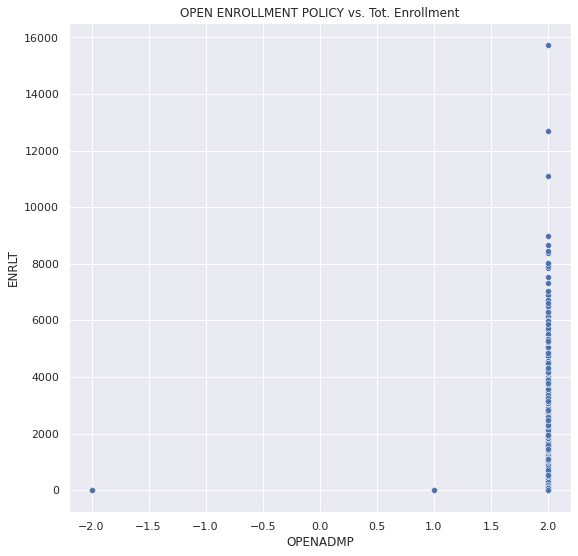

In [108]:
sns.set(rc = {'figure.figsize':(9,9)})
sns.scatterplot(data= df_merged_all_clean1, x='OPENADMP', y='ENRLT').set(title='OPEN ENROLLMENT POLICY vs. Tot. Enrollment')

### Institutions offering ROTC programs tend to be larger in size in terms of enrollment, whcih seems  reasobale given the diversification of the program offering

[Text(0.5, 1.0, 'ROTC vs. Tot. Enrollment')]

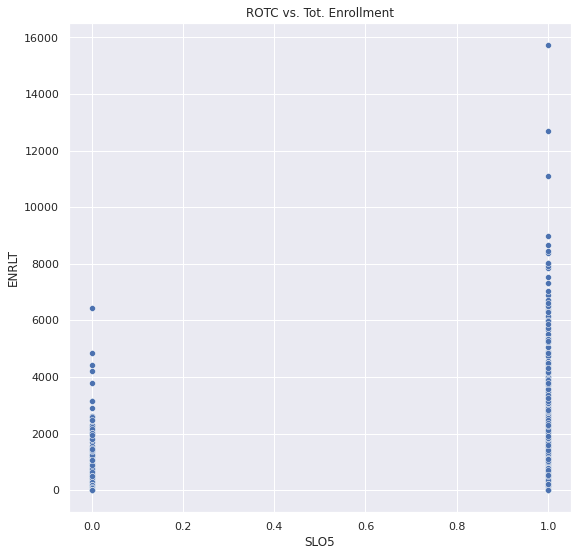

In [109]:
sns.set(rc = {'figure.figsize':(9,9)})
sns.scatterplot(data= df_merged_all_clean1, x='SLO5', y='ENRLT').set(title='ROTC vs. Tot. Enrollment')

# ROTC Offering
# SLO5	1	Yes
# SLO5	0	Implied no


### THe same is true for Study Abroad programs & teacher certification programs. Diversification of program offering seems to have an impact - we still need to check, however, whether it is simply size playing the primary role here

[Text(0.5, 1.0, 'Study Abroad vs. Tot. Enrollment')]

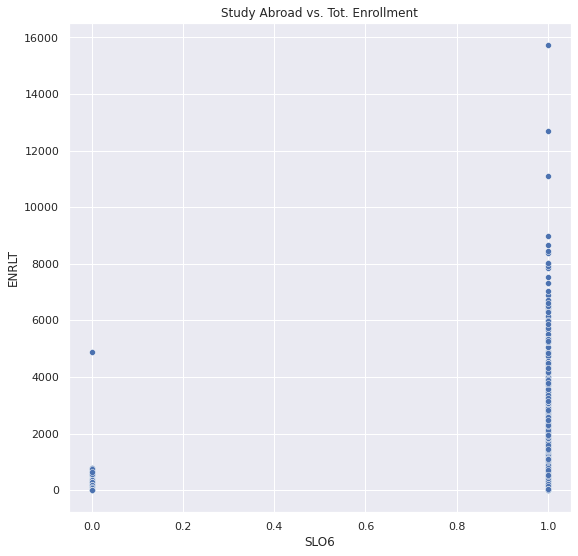

In [110]:
sns.set(rc = {'figure.figsize':(9,9)})
sns.scatterplot(data= df_merged_all_clean1, x='SLO6', y='ENRLT').set(title='Study Abroad vs. Tot. Enrollment')

# STUDY ABROAD PROGRAM  Offering
# SLO6	1	Yes
# SLO6	0	Implied no

[Text(0.5, 1.0, 'Teacher Certification Programs vs. Tot. Enrollment')]

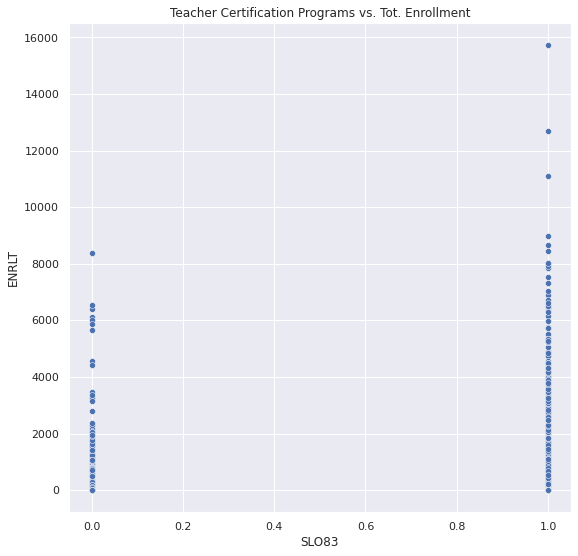

In [111]:
sns.set(rc = {'figure.figsize':(9,9)})
sns.scatterplot(data= df_merged_all_clean1, x='SLO83', y='ENRLT').set(title='Teacher Certification Programs vs. Tot. Enrollment')

### Most Institutions offer dorm-rooms for undergraduate students - as is tradition 

[Text(0.5, 1.0, 'Rooms vs. Tot. Enrollment')]

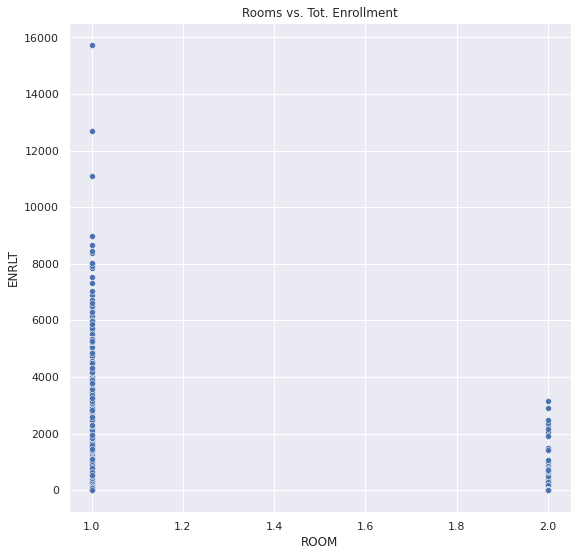

In [112]:
sns.set(rc = {'figure.figsize':(9,9)})
sns.scatterplot(data= df_merged_all_clean1, x='ROOM', y='ENRLT').set(title='Rooms vs. Tot. Enrollment')

[Text(0.5, 1.0, 'Boarding vs. Tot. Enrollment')]

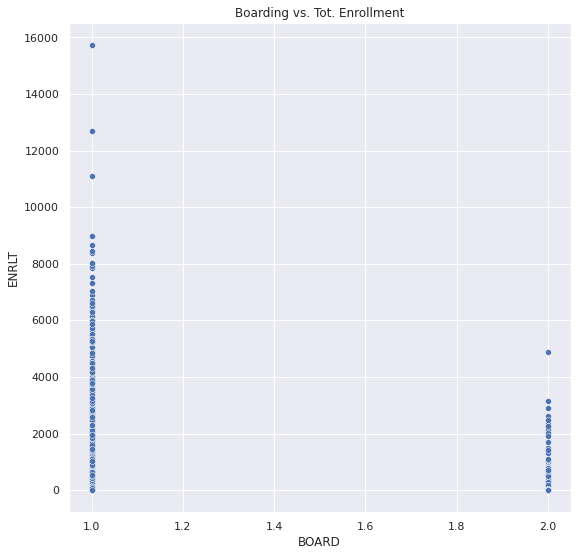

In [113]:
sns.set(rc = {'figure.figsize':(9,9)})
sns.scatterplot(data= df_merged_all_clean1, x='BOARD', y='ENRLT').set(title='Boarding vs. Tot. Enrollment')

### Application Fees seem to vary a little more widely and beyond a certain value there seems to be a negative effect of fee values with enrollments numbers 

[Text(0.5, 1.0, 'Application Fees vs. Tot. Enrollment')]

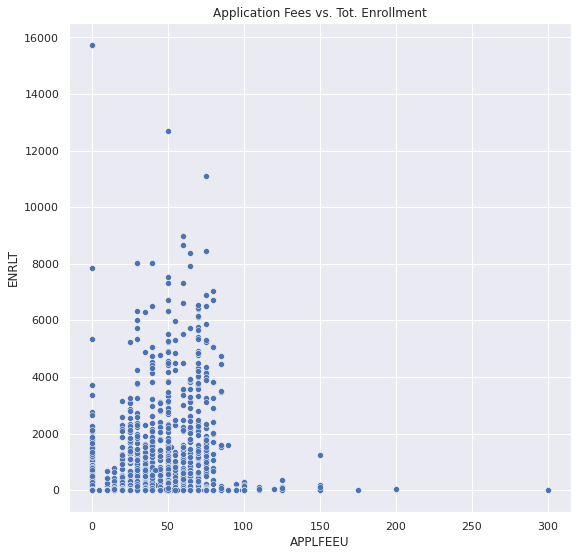

In [114]:
sns.set(rc = {'figure.figsize':(9,9)})
sns.scatterplot(data= df_merged_all_clean1, x='APPLFEEU', y='ENRLT').set(title='Application Fees vs. Tot. Enrollment')

### (1) Secondary School GPA  and (2) Secondary School Records are still being used by Institutions to determine Enrollment - They are in fact mostly required and recommended and seem to have a wider effect on enrolment totals

### On the other hand, (3) the Completion of College Preparatory Programs and (4) TOEFL tests for non-native speakers of the English Language, have a less clear effect on total enrollment, although they still seem to be evenly distributed in terms of use by Institutions 



[Text(0.5, 1.0, 'HS GPA vs. Tot. Enrollment')]

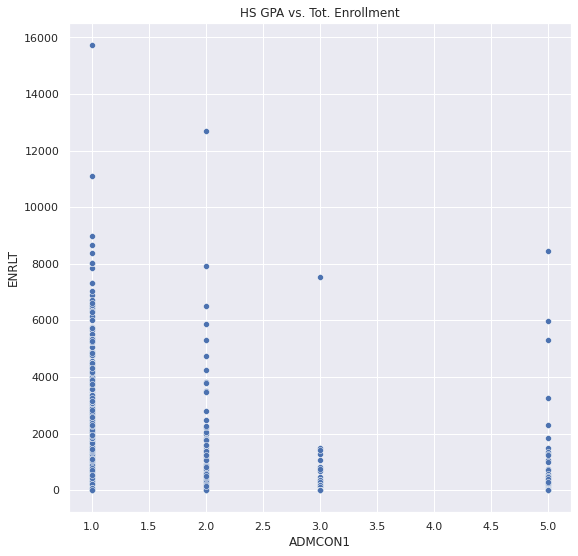

In [115]:
sns.set(rc = {'figure.figsize':(9,9)})
sns.scatterplot(data= df_merged_all_clean1, x='ADMCON1', y='ENRLT').set(title='HS GPA vs. Tot. Enrollment')


# ADMCON1	1	Required
# ADMCON1	5	Considered but not required
# ADMCON1	2	Recommended
# ADMCON1	3	Neither required nor recommended

# ADMCON1	Secondary school GPA


[Text(0.5, 1.0, 'HS Record vs. Tot. Enrollment')]

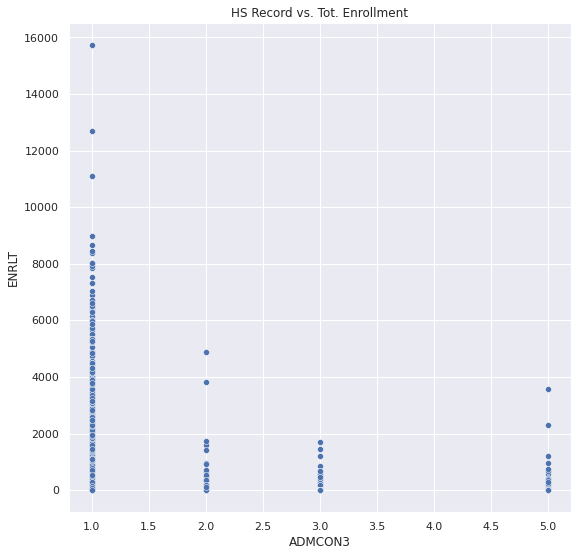

In [116]:
sns.set(rc = {'figure.figsize':(9,9)})
sns.scatterplot(data= df_merged_all_clean1, x='ADMCON3', y='ENRLT').set(title='HS Record vs. Tot. Enrollment')


# ADMCON2	1	Required
# ADMCON2	5	Considered but not required
# ADMCON2	2	Recommended
# ADMCON2	3	Neither required nor recommended

# ADMCON3	Secondary school record


[Text(0.5, 1.0, 'College Prep. Courses vs. Tot. Enrollment')]

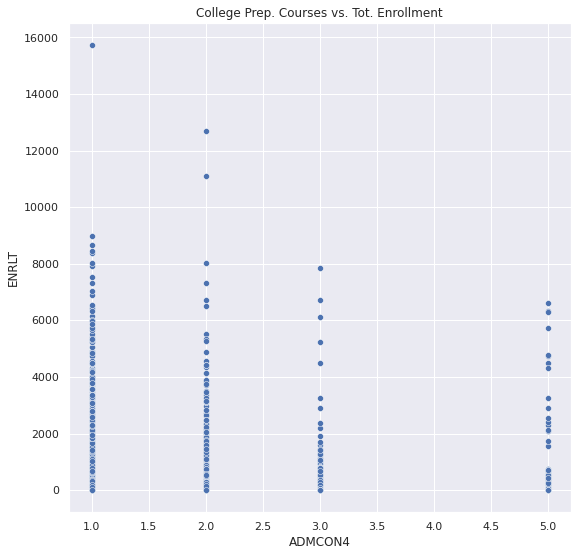

In [117]:
sns.set(rc = {'figure.figsize':(9,9)})
sns.scatterplot(data= df_merged_all_clean1, x='ADMCON4', y='ENRLT').set(title='College Prep. Courses vs. Tot. Enrollment')


# ADMCON1	1	Required
# ADMCON1	5	Considered but not required
# ADMCON1	2	Recommended
# ADMCON1	3	Neither required nor recommended

# ADMCON4	Completion of college-preparatory program


[Text(0.5, 1.0, 'TOEFL vs. Tot. Enrollment')]

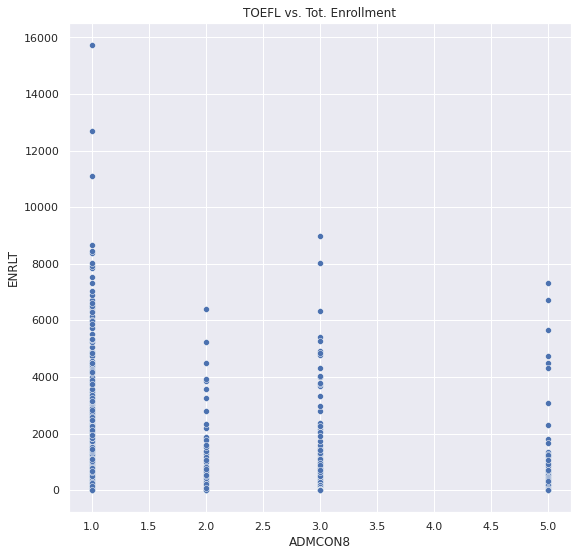

In [118]:
sns.set(rc = {'figure.figsize':(9,9)})
# sns.set_titles('Title of Plot')
sns.scatterplot(data= df_merged_all_clean1, x='ADMCON8', y='ENRLT').set(title='TOEFL vs. Tot. Enrollment')


# ADMCON8	1	Required
# ADMCON8	5	Considered but not required
# ADMCON8	2	Recommended
# ADMCON8	3	Neither required nor recommended

# ADMCON8	TOEFL (Test of English as a Foreign Language)



 OPENADMP, SLO5, SLO6, SLO83, ROOM, BOARD, APPLEFEEADMCON1, ADMCON3, ADMCON4, ADMCON8.

In [119]:
df_merged_all_clean1.columns

Index(['UNITID', 'INSTNM', 'STABBR', 'OBEREG', 'HLOFFER', 'GROFFER',
       'HDEGOFFR', 'HBCU', 'LOCALE', 'INSTCAT', 'INSTSIZE', 'CNTLAFFI',
       'LEVEL3', 'LEVEL5', 'CALSYS', 'FT_UG', 'FT_FTUG', 'PT_UG', 'PT_FTUG',
       'OPENADMP', 'VET1', 'VET2', 'CREDITS1', 'CREDITS2', 'CREDITS3',
       'CREDITS4', 'SLO5', 'SLO6', 'SLO7', 'SLO83', 'YRSCOLL', 'STUSRV1',
       'STUSRV2', 'STUSRV3', 'STUSRV4', 'STUSRV8', 'STUSRV9', 'LIBRES1',
       'TUITPL', 'TUITPL1', 'TUITPL2', 'TUITPL3', 'TUITPL4', 'DSTNUGC',
       'DSTNUGP', 'DSTNCED1', 'ALLONCAM', 'TUITVARY', 'ROOM', 'BOARD',
       'APPLFEEU', 'RMANDBRDAMT', 'EFYTOTLT', 'ADMCON1', 'ADMCON2', 'ADMCON3',
       'ADMCON4', 'ADMCON5', 'ADMCON6', 'ADMCON7', 'ADMCON8', 'ADMCON9',
       'APPLCN', 'ADMSSN', 'ENRLT'],
      dtype='object')

In [120]:
# sns.scatterplot(data= df_merged_all_clean1, x='ADMSSN', y='ENRLT', hue='HBCU')

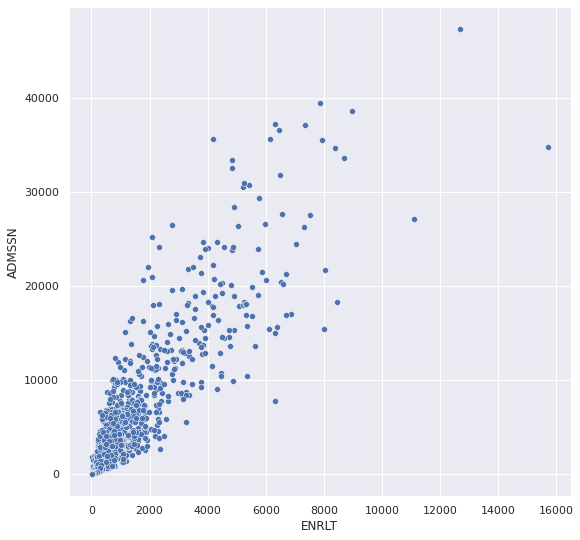

In [121]:
sns.scatterplot(data= df_merged_all_clean1, x='ENRLT', y='ADMSSN')

In [122]:
df_merged_all_clean1.columns

Index(['UNITID', 'INSTNM', 'STABBR', 'OBEREG', 'HLOFFER', 'GROFFER',
       'HDEGOFFR', 'HBCU', 'LOCALE', 'INSTCAT', 'INSTSIZE', 'CNTLAFFI',
       'LEVEL3', 'LEVEL5', 'CALSYS', 'FT_UG', 'FT_FTUG', 'PT_UG', 'PT_FTUG',
       'OPENADMP', 'VET1', 'VET2', 'CREDITS1', 'CREDITS2', 'CREDITS3',
       'CREDITS4', 'SLO5', 'SLO6', 'SLO7', 'SLO83', 'YRSCOLL', 'STUSRV1',
       'STUSRV2', 'STUSRV3', 'STUSRV4', 'STUSRV8', 'STUSRV9', 'LIBRES1',
       'TUITPL', 'TUITPL1', 'TUITPL2', 'TUITPL3', 'TUITPL4', 'DSTNUGC',
       'DSTNUGP', 'DSTNCED1', 'ALLONCAM', 'TUITVARY', 'ROOM', 'BOARD',
       'APPLFEEU', 'RMANDBRDAMT', 'EFYTOTLT', 'ADMCON1', 'ADMCON2', 'ADMCON3',
       'ADMCON4', 'ADMCON5', 'ADMCON6', 'ADMCON7', 'ADMCON8', 'ADMCON9',
       'APPLCN', 'ADMSSN', 'ENRLT'],
      dtype='object')

In [123]:
# # plt.subplots(3,3, figsize=(15, 15))

# for col in (df_merged_all_clean1.columns):
#   # ax= plt.subplot(col)
#   # ax.yaxis.set_ticklabels([])
#   ax =sns.countplot(df_merged_all_clean1[col])
#   # sns.distplot(df_merged_all_clean1.loc[df_merged_all_clean1.HBCU ==2][col],hist=False, axlabel=False,
#   # kde_kws={'linestyle':'-','color':'blue','label':"NO HBCU"})
#   # sns.distplot(df_merged_all_clean1.loc[df_merged_all_clean1.HBCU ==1][col],hist=False, axlabel=False,
#   # kde_kws={'linestyle':'--','color':'green','label':"HBCU"})
#   ax.set_title(col)


# # plt.subplot(3,3).set_visible(False)

# # plt.show()

In [124]:
# # AFter much work a classmate shared  this resource - it made the work a lot easier :-) 

# # https://books.google.com/books?id=6AuLDwAAQBAJ&pg=PA51&lpg=PA51&dq=3+x+3+subplots+with+all+9+variables&source=bl&ots=gVTB3a1bka&sig=ACfU3U2_2BLYdumv7CwtQrrs9mY1T-ASCg&hl=en&sa=X&ved=2ahUKEwjIrY-k1bn0AhU7QjABHQMhDuwQ6AF6BAgVEAM#v=onepage&q=3%20x%203%20subplots%20with%20all%209%20variables&f=false

# # Create a subplot of 3 X 3 and plot a density plot for each variable. 

# plt.subplots(3,3, figsize=(15, 15))

# for idx, col in enumerate (df_merged_all_clean1.columns):
#   ax= plt.subplot(3, 3, idx+1)
#   ax.yaxis.set_ticklabels([])
#   sns.distplot(df_merged_all_clean1.loc[df_merged_all_clean1.HBCU ==2][col],hist=False, axlabel=False,
#   kde_kws={'linestyle':'-','color':'blue','label':"NO HBCU"})
#   sns.distplot(df_merged_all_clean1.loc[df_merged_all_clean1.HBCU ==1][col],hist=False, axlabel=False,
#   kde_kws={'linestyle':'--','color':'green','label':"HBCU"})
#   ax.set_title(col)


# plt.subplot(3,3).set_visible(False)

# plt.show()

In [125]:
# # Visualize the difference in distribution between enrollment and non-diabetics with separate plots using Seaborn.
# sns.displot(
#     df, x='Pregnancies', col="Outcome",
#     binwidth=3, height=3, facet_kws=dict(margin_titles=True),
# )
# sns.displot(
#     df, x='Glucose', col="Outcome",
#     binwidth=3, height=3, facet_kws=dict(margin_titles=True),
# )
# sns.displot(
#     df, x='BloodPressure', col="Outcome",
#     binwidth=3, height=3, facet_kws=dict(margin_titles=True),
# )
# sns.displot(
#     df, x='SkinThickness', col="Outcome",
#     binwidth=3, height=3, facet_kws=dict(margin_titles=True),
# )
# sns.displot(
#     df, x='Insulin', col="Outcome",
#     binwidth=3, height=3, facet_kws=dict(margin_titles=True),
# )
# sns.displot(
#     df, x='BMI', col="Outcome",
#     binwidth=3, height=3, facet_kws=dict(margin_titles=True),
# )
# sns.displot(
#     df, x='DiabetesPedigreeFunction', col="Outcome",
#     binwidth=3, height=3, facet_kws=dict(margin_titles=True),
# )
# sns.displot(
#     df, x='Age', col="Outcome",
#     binwidth=3, height=3, facet_kws=dict(margin_titles=True),
# )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7b3c15110>,
      dtype=object)

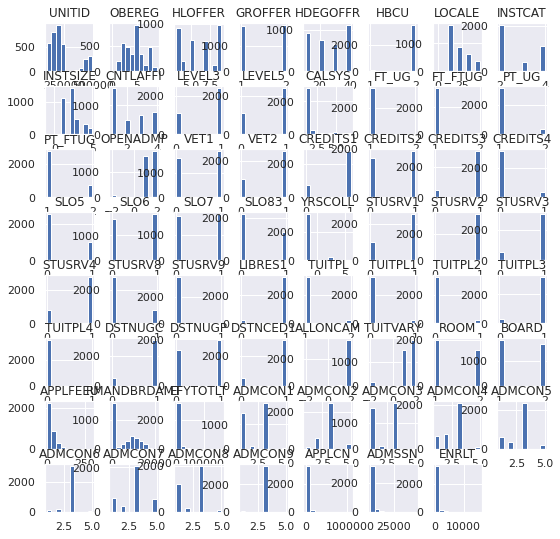

In [126]:
# df_merged_all_clean1['ADMCON1'].astype(int)
df_merged_all_clean1.hist(figsize=(9, 9))

In [127]:
# formula = 'TOTFRL ~ AM + HI + BL + WH + HP + TR'
# results = ols(formula, df1).fit()

# print(results.summary())